In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For our modeling steps
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
from sklearn.utils import resample
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report


# For demonstrative purposes
from scipy.special import logit, expit
from sklearn import datasets




# After Importing we load our datasets and begin EDA

In [2]:
crashes_df = pd.read_csv('Data/Traffic_Crashes_-_Crashes.csv', low_memory=False)
people_df = pd.read_csv('Data/Traffic_Crashes_-_People.csv', low_memory=False)
vehicles_df = pd.read_csv('Data/Traffic_Crashes_-_Vehicles.csv', low_memory=False)

In [3]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767532 entries, 0 to 767531
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                767532 non-null  object 
 1   RD_NO                          763205 non-null  object 
 2   CRASH_DATE_EST_I               57802 non-null   object 
 3   CRASH_DATE                     767532 non-null  object 
 4   POSTED_SPEED_LIMIT             767532 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         767532 non-null  object 
 6   DEVICE_CONDITION               767532 non-null  object 
 7   WEATHER_CONDITION              767532 non-null  object 
 8   LIGHTING_CONDITION             767532 non-null  object 
 9   FIRST_CRASH_TYPE               767532 non-null  object 
 10  TRAFFICWAY_TYPE                767532 non-null  object 
 11  LANE_CNT                       199005 non-null  float64
 12  ALIGNMENT                     

In [4]:
import pandas as pd
from datetime import datetime, timedelta


crashes_df['CRASH_DATE'] = pd.to_datetime(crashes_df['CRASH_DATE'])

# Calculate the date one year ago from today
last_year_date = datetime.now() - timedelta(days=365)

# Filter rows with fatal injuries and within the last year
fatal_injuries_last_year = crashes_df[(crashes_df['INJURIES_FATAL'] == 1) & (crashes_df['CRASH_DATE'] >= last_year_date)]

# Count the number of fatal injuries in the last year
num_fatal_injuries_last_year = len(fatal_injuries_last_year)

print(f"Number of fatal injuries in the last year: {num_fatal_injuries_last_year}")


Number of fatal injuries in the last year: 129


In [5]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565880 entries, 0 to 1565879
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1565880 non-null  int64  
 1   CRASH_RECORD_ID           1565880 non-null  object 
 2   RD_NO                     1557005 non-null  object 
 3   CRASH_DATE                1565880 non-null  object 
 4   UNIT_NO                   1565880 non-null  int64  
 5   UNIT_TYPE                 1563812 non-null  object 
 6   NUM_PASSENGERS            231796 non-null   float64
 7   VEHICLE_ID                1530129 non-null  float64
 8   CMRC_VEH_I                29207 non-null    object 
 9   MAKE                      1530124 non-null  object 
 10  MODEL                     1529979 non-null  object 
 11  LIC_PLATE_STATE           1390241 non-null  object 
 12  VEHICLE_YEAR              1282990 non-null  float64
 13  VEHICLE_DEFECT            1

In [6]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685268 entries, 0 to 1685267
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1685268 non-null  object 
 1   PERSON_TYPE            1685268 non-null  object 
 2   CRASH_RECORD_ID        1685268 non-null  object 
 3   RD_NO                  1675604 non-null  object 
 4   VEHICLE_ID             1651722 non-null  float64
 5   CRASH_DATE             1685268 non-null  object 
 6   SEAT_NO                341179 non-null   float64
 7   CITY                   1227951 non-null  object 
 8   STATE                  1245508 non-null  object 
 9   ZIPCODE                1124903 non-null  object 
 10  SEX                    1657870 non-null  object 
 11  AGE                    1193552 non-null  float64
 12  DRIVERS_LICENSE_STATE  988305 non-null   object 
 13  DRIVERS_LICENSE_CLASS  830015 non-null   object 
 14  SAFETY_EQUIPMENT  

In [7]:
# Sample a portion of your data
sampled_crashes_df = crashes_df.sample(frac=0.2, random_state=42)  # Adjust the fraction as needed
sampled_people_df = people_df.sample(frac=0.2, random_state=42)
sampled_vehicles_df = vehicles_df.sample(frac=0.2, random_state=42)
# Then perform your merge operations on the sampled data
sampled_crashes_df = pd.merge(sampled_crashes_df, sampled_vehicles_df, on='CRASH_RECORD_ID', how='left')
sampled_crashes_df = pd.merge(sampled_crashes_df, sampled_people_df, on='CRASH_RECORD_ID', how='left')




In [8]:
sampled_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171787 entries, 0 to 171786
Columns: 149 entries, CRASH_RECORD_ID to CELL_PHONE_USE
dtypes: datetime64[ns](1), float64(26), int64(6), object(116)
memory usage: 196.6+ MB


In [9]:
uniquespeeds = sampled_crashes_df['CELL_PHONE_USE'].unique()
print(uniquespeeds)

[nan 'Y' 'N']


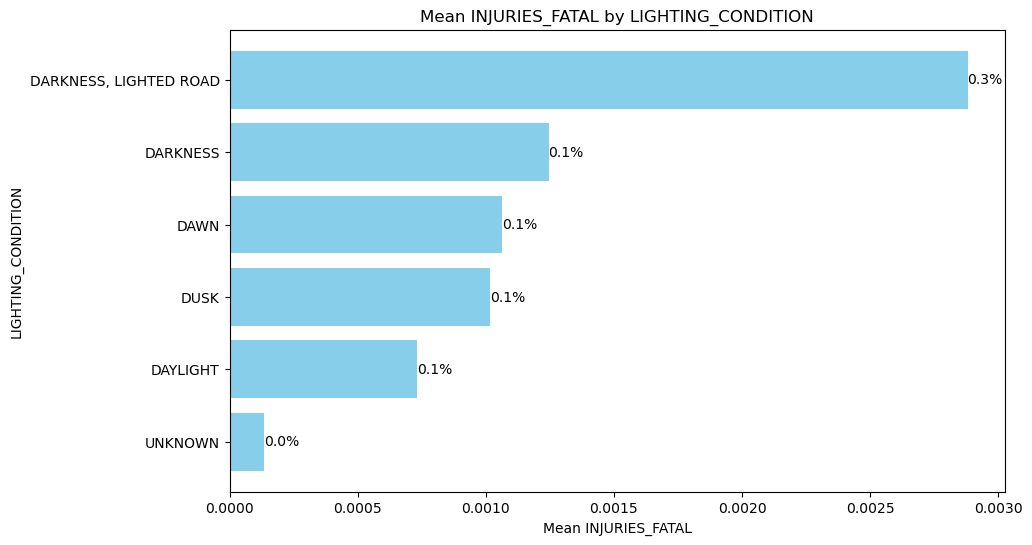

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'LIGHTING_CONDITION' and calculate the mean of 'INJURIES_FATAL'
lighting_injuries = sampled_crashes_df.groupby('LIGHTING_CONDITION')['INJURIES_FATAL'].mean().reset_index()

# Sort the data for a better visualization
lighting_injuries = lighting_injuries.sort_values(by='INJURIES_FATAL', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(lighting_injuries['LIGHTING_CONDITION'], lighting_injuries['INJURIES_FATAL'], color='skyblue')
plt.xlabel('Mean INJURIES_FATAL')
plt.ylabel('LIGHTING_CONDITION')
plt.title('Mean INJURIES_FATAL by LIGHTING_CONDITION')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest injury condition at the top

# Add percentages on top of the bars
for bar in bars:
    percentage = bar.get_width()
    plt.text(percentage, bar.get_y() + bar.get_height()/2, f'{percentage:.1%}', ha='left', va='center', fontsize=10)

plt.show()


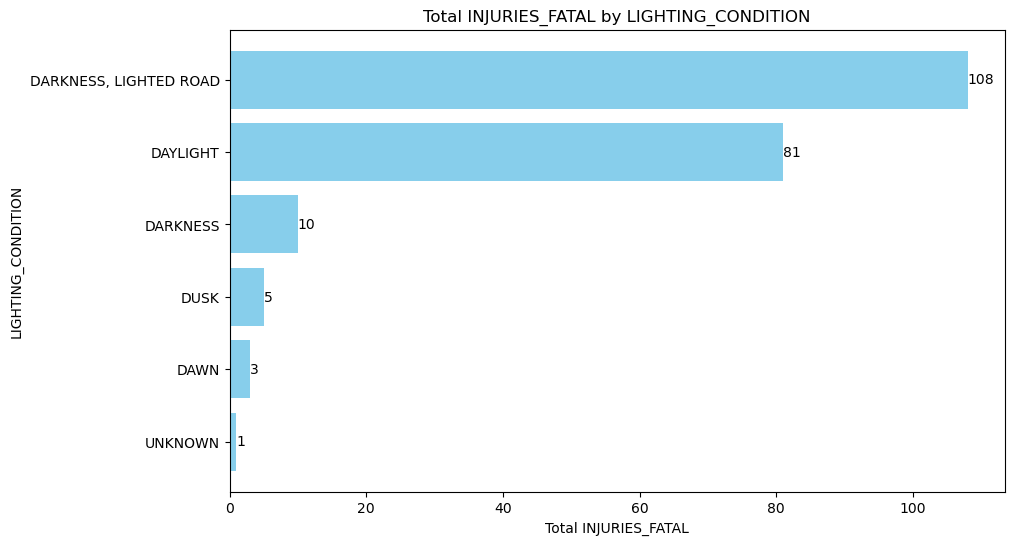

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'LIGHTING_CONDITION' and count the total number of 'INJURIES_FATAL'
lighting_injuries = sampled_crashes_df.groupby('LIGHTING_CONDITION')['INJURIES_FATAL'].sum().reset_index()

# Sort the data for a better visualization
lighting_injuries = lighting_injuries.sort_values(by='INJURIES_FATAL', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(lighting_injuries['LIGHTING_CONDITION'], lighting_injuries['INJURIES_FATAL'], color='skyblue')
plt.xlabel('Total INJURIES_FATAL')
plt.ylabel('LIGHTING_CONDITION')
plt.title('Total INJURIES_FATAL by LIGHTING_CONDITION')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest injury condition at the top

# Add the actual quantity on top of the bars
for bar in bars:
    quantity = bar.get_width()
    plt.text(quantity, bar.get_y() + bar.get_height() / 2, f'{int(quantity)}', ha='left', va='center', fontsize=10)

plt.show()


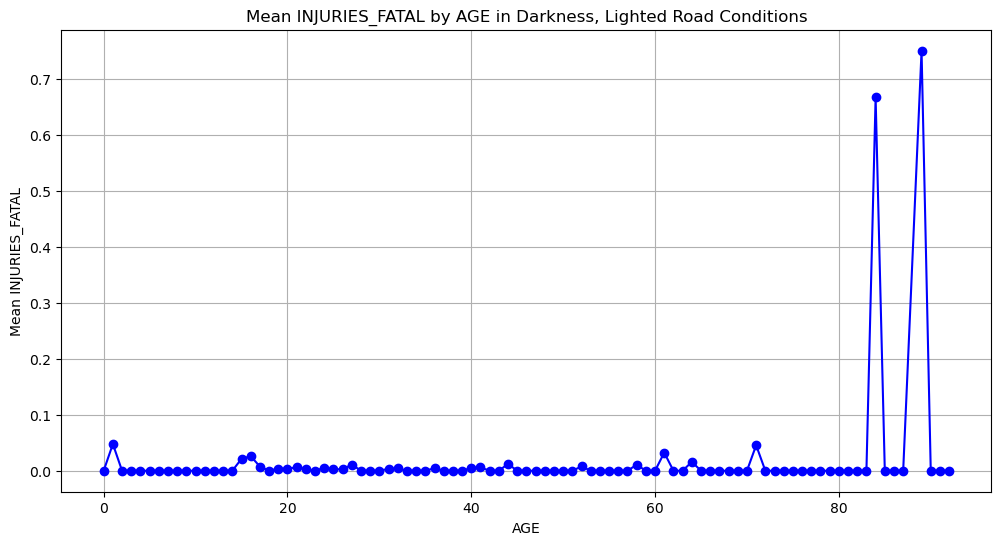

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the data for 'LIGHTING_CONDITION' equal to 'DARKNESS, LIGHTED ROAD'
darkness_lighted_road_df = sampled_crashes_df[sampled_crashes_df['LIGHTING_CONDITION'] == 'DARKNESS, LIGHTED ROAD']

# Group the filtered data by 'AGE' and calculate the mean of 'INJURIES_FATAL'
age_injuries = darkness_lighted_road_df.groupby('AGE')['INJURIES_FATAL'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(age_injuries['AGE'], age_injuries['INJURIES_FATAL'], marker='o', linestyle='-', color='b')
plt.xlabel('AGE')
plt.ylabel('Mean INJURIES_FATAL')
plt.title('Mean INJURIES_FATAL by AGE in Darkness, Lighted Road Conditions')
plt.grid(True)
plt.show()


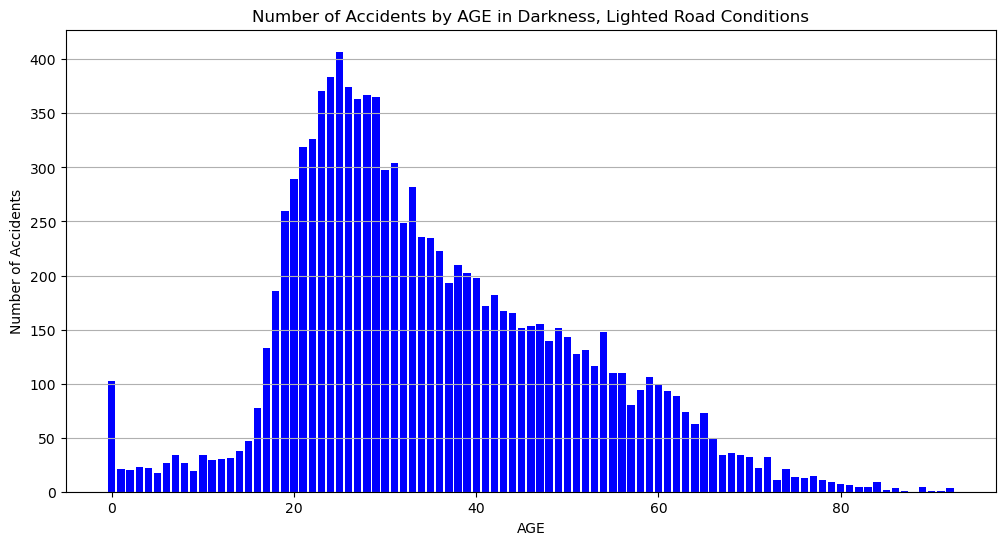

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the data for 'LIGHTING_CONDITION' equal to 'DARKNESS, LIGHTED ROAD'
darkness_lighted_road_df = sampled_crashes_df[sampled_crashes_df['LIGHTING_CONDITION'] == 'DARKNESS, LIGHTED ROAD']

# Group the filtered data by 'AGE' and count the number of accidents
age_accidents = darkness_lighted_road_df.groupby('AGE').size().reset_index(name='NUM_ACCIDENTS')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(age_accidents['AGE'], age_accidents['NUM_ACCIDENTS'], color='b')
plt.xlabel('AGE')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by AGE in Darkness, Lighted Road Conditions')
plt.grid(axis='y')
plt.show()



In [14]:

# Filter the data for accidents on "DARKNESS, LIGHTED ROAD" conditions
dark_lighted_road_df = sampled_crashes_df[sampled_crashes_df['LIGHTING_CONDITION'] == 'DARKNESS, LIGHTED ROAD']

# Filter the above data for drivers aged 16-25
young_driver_dark_lighted_road_df = dark_lighted_road_df[(dark_lighted_road_df['AGE'] >= 16) & (dark_lighted_road_df['AGE'] <= 30)]

# Calculate the percentage of accidents on "DARKNESS, LIGHTED ROAD" attributed to young drivers
percentage_young_drivers_dark_lighted_road = (len(young_driver_dark_lighted_road_df) / len(dark_lighted_road_df)) * 100

print(f"The percentage of accidents on 'DARKNESS, LIGHTED ROAD' attributed to drivers aged 16-25 is: {percentage_young_drivers_dark_lighted_road:.2f}%")


The percentage of accidents on 'DARKNESS, LIGHTED ROAD' attributed to drivers aged 16-25 is: 12.00%


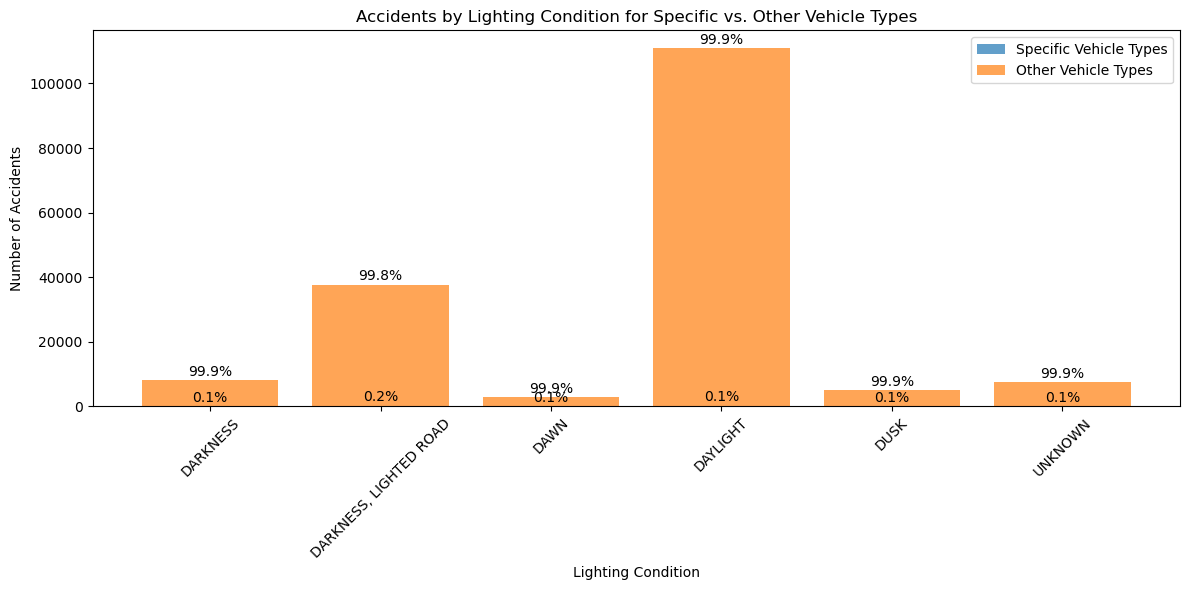

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for specific vehicle types
specific_vehicle_types = ['MOTORCYCLE (OVER 150CC)', 'MOPED OR MOTORIZED BICYCLE',
                          'MOTOR DRIVEN CYCLE', '3-WHEELED MOTORCYCLE (2 REAR WHEELS)',
                          'AUTOCYCLE']

specific_df = sampled_crashes_df[sampled_crashes_df['VEHICLE_TYPE'].isin(specific_vehicle_types)]

# Filter for other vehicle types
other_df = sampled_crashes_df[~sampled_crashes_df['VEHICLE_TYPE'].isin(specific_vehicle_types)]

# Group by 'LIGHTING_CONDITION' and count accidents
specific_counts = specific_df['LIGHTING_CONDITION'].value_counts().sort_index()
other_counts = other_df['LIGHTING_CONDITION'].value_counts().sort_index()

# Calculate total counts
total_counts = specific_counts + other_counts

# Create a bar graph
plt.figure(figsize=(12, 6))

# Plot specific vehicle types
plt.bar(specific_counts.index, specific_counts.values, label='Specific Vehicle Types', alpha=0.7)
for x, y in zip(specific_counts.index, specific_counts.values):
    percentage = (y / total_counts[x]) * 100
    plt.text(x, y + 500, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Plot other vehicle types
plt.bar(other_counts.index, other_counts.values, label='Other Vehicle Types', alpha=0.7, bottom=specific_counts.values)
for x, y in zip(other_counts.index, other_counts.values):
    percentage = (y / total_counts[x]) * 100
    plt.text(x, y + specific_counts[x] + 500, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Lighting Condition for Specific vs. Other Vehicle Types')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
# Fill missing values in 'SAFETY_EQUIPMENT' with "UNKNOWN"
sampled_crashes_df['SAFETY_EQUIPMENT'].fillna("UNKNOWN", inplace=True)
# Create boolean columns for "SAFETY BELT USED" and "SAFETY BELT NOT USED"
sampled_crashes_df['SAFETY_BELT_USED'] = sampled_crashes_df['SAFETY_EQUIPMENT'].str.contains("SAFETY BELT USED", case=False)
sampled_crashes_df['SAFETY_BELT_NOT_USED'] = sampled_crashes_df['SAFETY_EQUIPMENT'].str.contains("SAFETY BELT NOT USED", case=False)

# Convert the boolean values to 1 (True) and 0 (False)
sampled_crashes_df['SAFETY_BELT_USED'] = sampled_crashes_df['SAFETY_BELT_USED'].astype(int)
sampled_crashes_df['SAFETY_BELT_NOT_USED'] = sampled_crashes_df['SAFETY_BELT_NOT_USED'].astype(int)


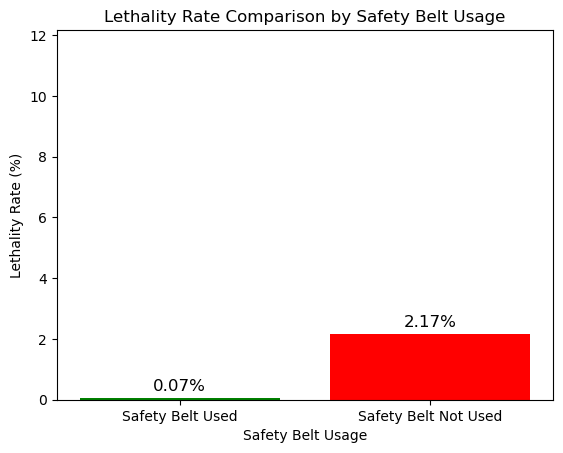

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter for accidents where SAFETY_BELT_USED is true
safety_belt_used_df = sampled_crashes_df[sampled_crashes_df['SAFETY_BELT_USED'] == 1]

# Filter for accidents where SAFETY_BELT_NOT_USED is true
safety_belt_not_used_df = sampled_crashes_df[sampled_crashes_df['SAFETY_BELT_NOT_USED'] == 1]

# Calculate lethality rates
lethality_rate_safety_belt_used = (safety_belt_used_df['INJURIES_FATAL'].sum() / len(safety_belt_used_df)) * 100
lethality_rate_safety_belt_not_used = (safety_belt_not_used_df['INJURIES_FATAL'].sum() / len(safety_belt_not_used_df)) * 100

# Create a bar graph
labels = ['Safety Belt Used', 'Safety Belt Not Used']
lethality_rates = [lethality_rate_safety_belt_used, lethality_rate_safety_belt_not_used]

fig, ax = plt.subplots()
bars = plt.bar(labels, lethality_rates, color=['green', 'red'])
plt.xlabel('Safety Belt Usage')
plt.ylabel('Lethality Rate (%)')
plt.title('Lethality Rate Comparison by Safety Belt Usage')
plt.ylim(0, max(lethality_rates) + 10)  # Adjust the y-axis limit for better visualization

# Add labels with values above the bars
for bar, lethality_rate in zip(bars, lethality_rates):
    height = bar.get_height()
    ax.annotate(f'{lethality_rate:.2f}%',  # Format the label as a percentage with two decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset the label above the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.show()


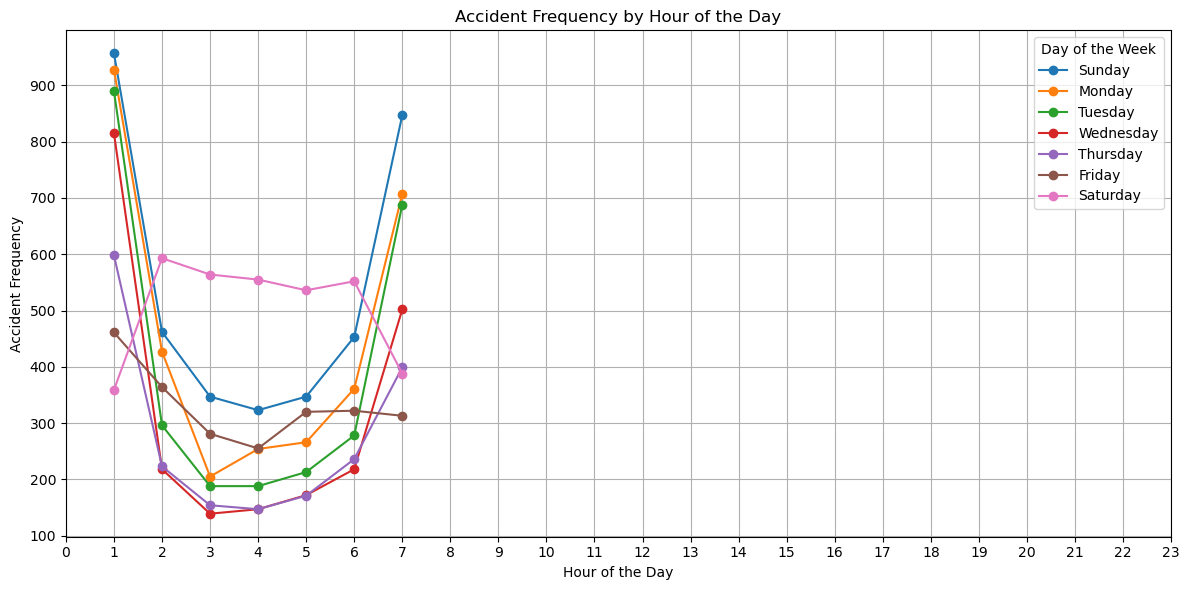

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by both CRASH_HOUR and CRASH_DAY_OF_WEEK
hourly_day_counts = sampled_crashes_df.groupby(['CRASH_HOUR', 'CRASH_DAY_OF_WEEK']).size().unstack(fill_value=0)

# Create a list of days of the week (assuming 0 = Sunday, 1 = Monday, ..., 6 = Saturday)
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a single subplot for all days of the week
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through each day of the week and plot the data
for i, day in enumerate(days_of_week):
    day_data = hourly_day_counts.iloc[i]
    ax.plot(day_data.index, day_data.values, marker='o', label=day)

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Accident Frequency')
ax.set_title('Accident Frequency by Hour of the Day')
ax.set_xticks(range(24))  # Set x-axis ticks to show each hour of the day
ax.legend(title='Day of the Week')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


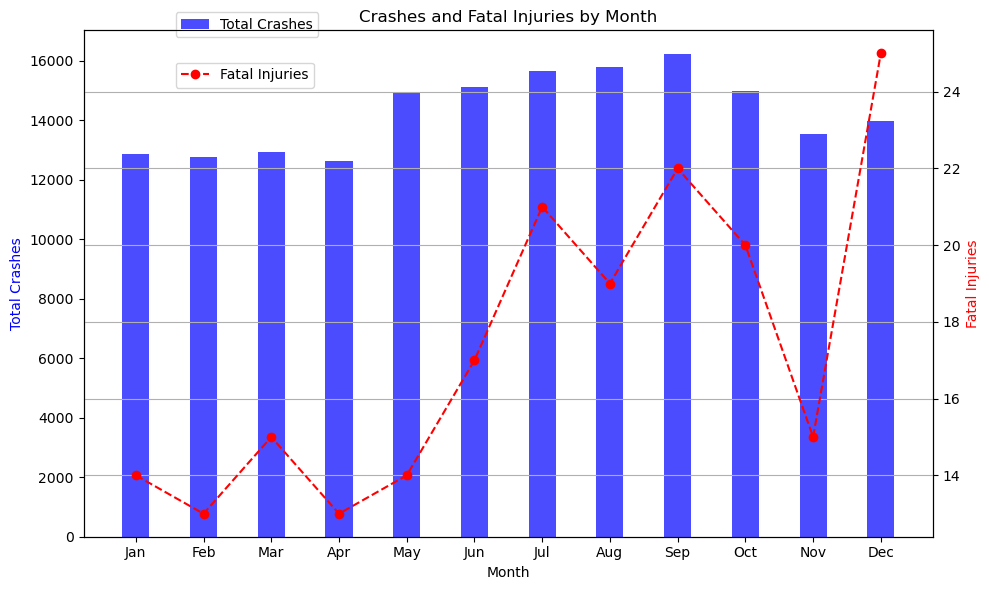

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by CRASH_MONTH and calculate the sum of fatal injuries for each month
monthly_data = sampled_crashes_df.groupby('CRASH_MONTH')['INJURIES_FATAL'].agg(['count', 'sum'])

# Create a bar plot to visualize the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the total crash count
ax1.bar(monthly_data.index, monthly_data['count'], alpha=0.7, label='Total Crashes', color='b', width=0.4)

# Create a secondary y-axis for fatal injuries
ax2 = ax1.twinx()
ax2.plot(monthly_data.index, monthly_data['sum'], marker='o', label='Fatal Injuries', color='r', linestyle='--')

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Crashes', color='b')
ax2.set_ylabel('Fatal Injuries', color='r')
plt.title('Crashes and Fatal Injuries by Month')

# Set x-axis ticks and labels
plt.xticks(monthly_data.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.1, 1.05))
ax2.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


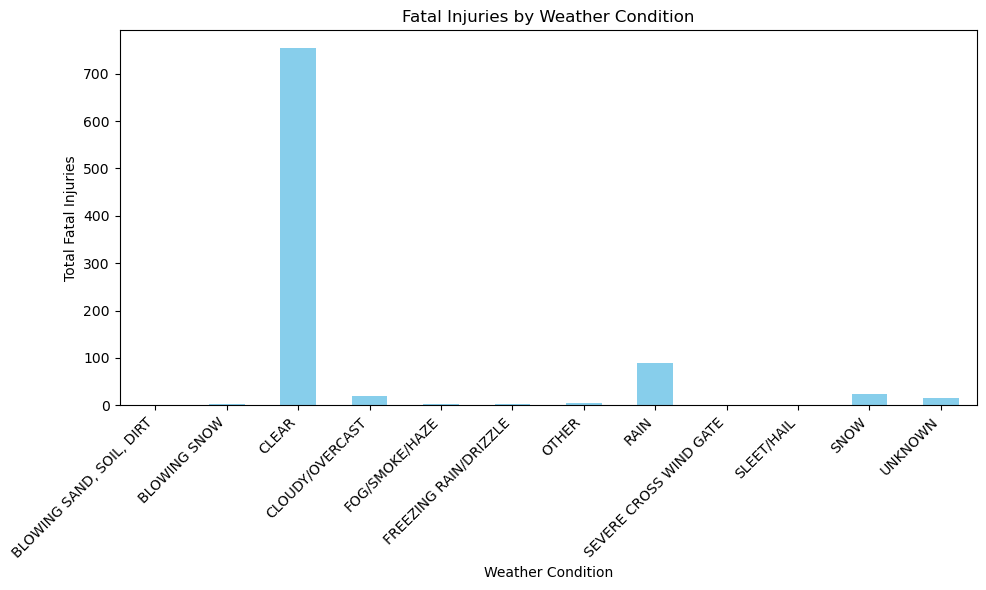

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'WEATHER_CONDITION' and calculate the sum of 'INJURIES_FATAL'
weather_fatalities = crashes_df.groupby('WEATHER_CONDITION')['INJURIES_FATAL'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
weather_fatalities.plot(kind='bar', color='skyblue')
plt.title('Fatal Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


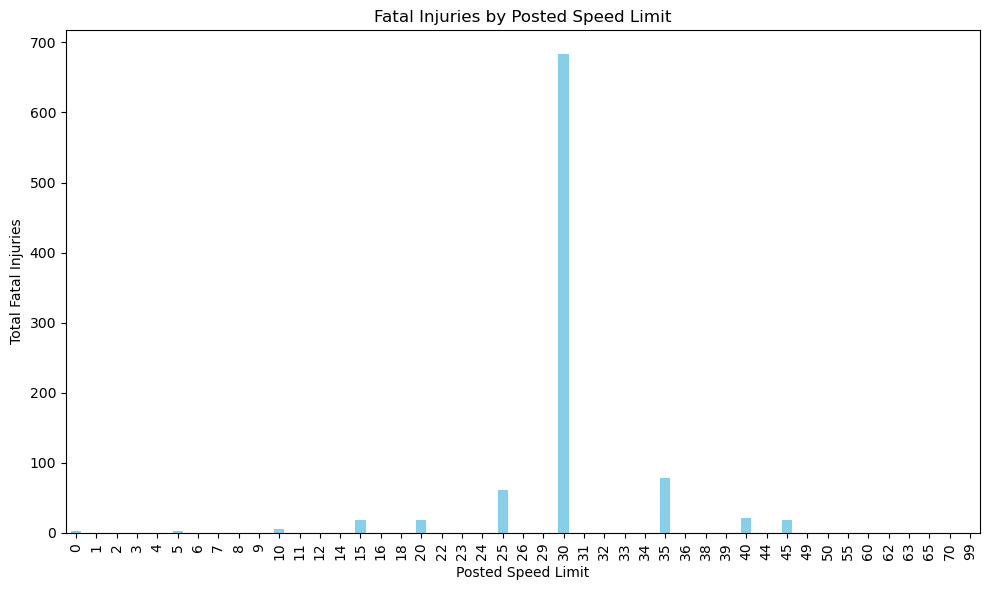

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'POSTED_SPEED_LIMIT' and calculate the sum of 'INJURIES_FATAL'
speed_limit_fatalities = crashes_df.groupby('POSTED_SPEED_LIMIT')['INJURIES_FATAL'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
speed_limit_fatalities.plot(kind='bar', color='skyblue')
plt.title('Fatal Injuries by Posted Speed Limit')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Total Fatal Injuries')

# Show the plot
plt.tight_layout()
plt.show()


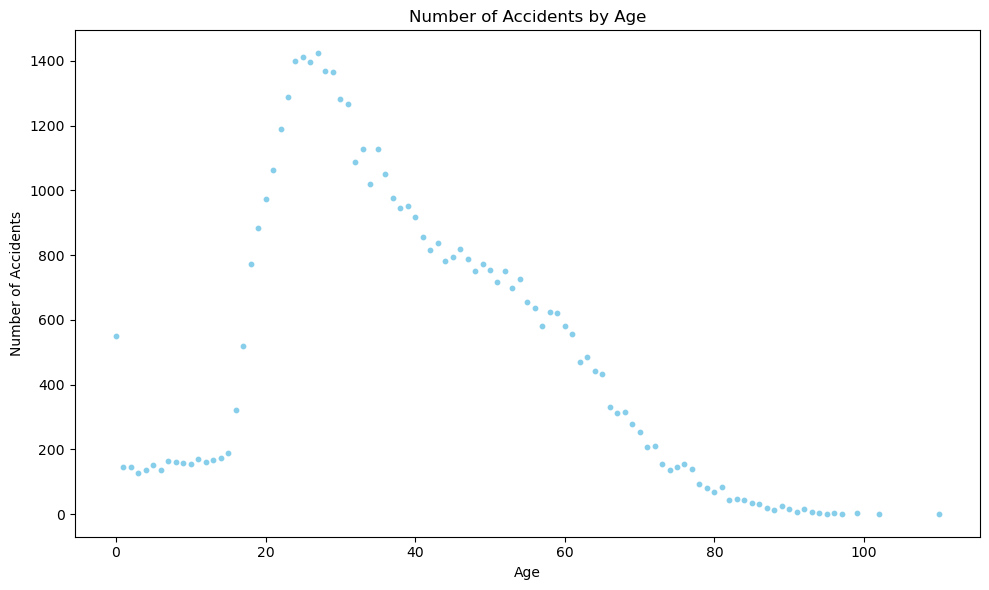

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'AGE' and count the number of accidents for each age
age_accidents_count = sampled_crashes_df['AGE'].value_counts().sort_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age_accidents_count.index, age_accidents_count.values, color='skyblue', s=10)
plt.title('Number of Accidents by Age')
plt.xlabel('Age')
plt.ylabel('Number of Accidents')

# Show the plot
plt.tight_layout()
plt.show()


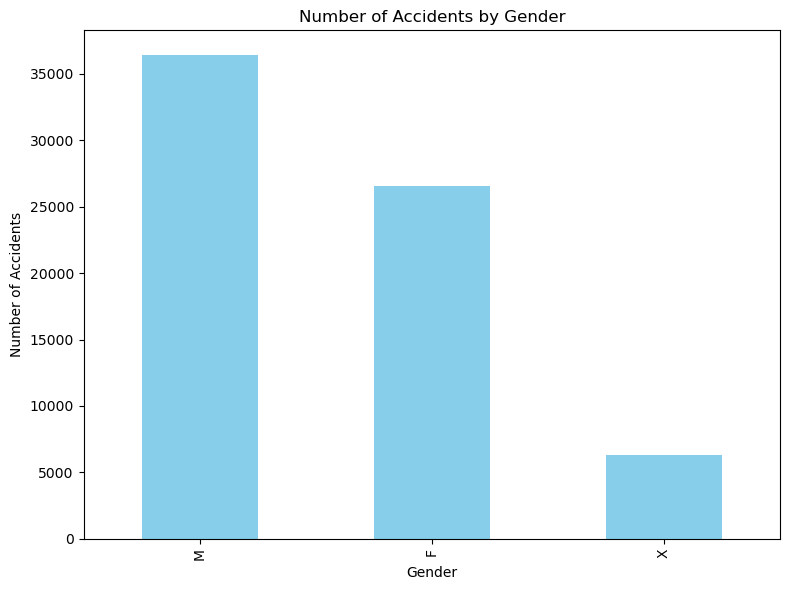

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'SEX' and count the number of accidents for each gender
sex_accidents_count = sampled_crashes_df['SEX'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sex_accidents_count.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Accidents')

# Show the plot
plt.tight_layout()
plt.show()


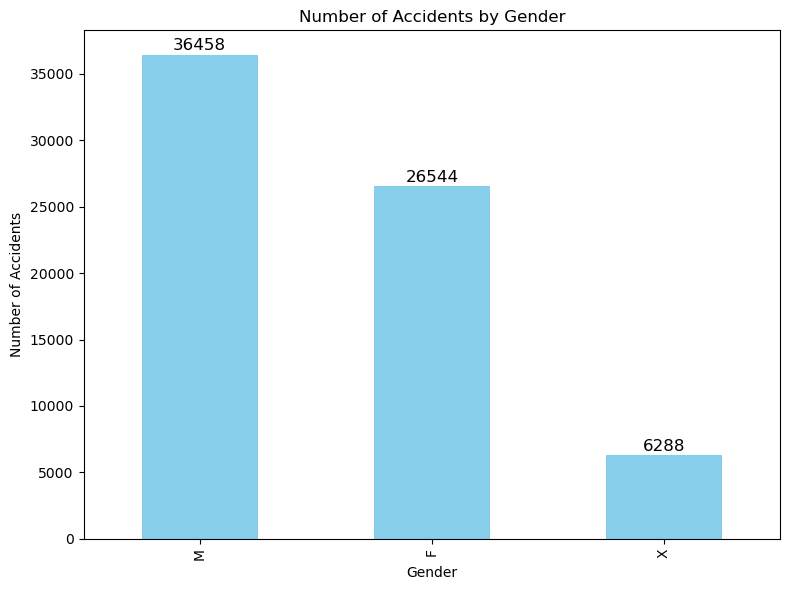

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'SEX' and count the number of accidents for each gender
sex_accidents_count = sampled_crashes_df['SEX'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = sex_accidents_count.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Accidents')

# Display the values above the bars
for i, v in enumerate(sex_accidents_count):
    bars.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
# Given data
men_crashes = 36458
women_crashes = 26544

# Calculate the percentage increase
percentage_increase = ((men_crashes - women_crashes) / women_crashes) * 100

print(f"Men are {percentage_increase:.2f}% more likely to get into a crash than women.")


Men are 37.35% more likely to get into a crash than women.


In [26]:
from sklearn.impute import SimpleImputer

# Create an imputer object for numerical columns (AGE)
age_imputer = SimpleImputer(strategy='mean')
sampled_crashes_df['AGE'] = age_imputer.fit_transform(sampled_crashes_df[['AGE']])

# Create an imputer object for categorical columns (SEX and WEATHER_CONDITION)
cat_imputer = SimpleImputer(strategy='most_frequent')
sampled_crashes_df['SEX'] = cat_imputer.fit_transform(sampled_crashes_df[['SEX']])
sampled_crashes_df['WEATHER_CONDITION'] = cat_imputer.fit_transform(sampled_crashes_df[['WEATHER_CONDITION']])


In [27]:
sampled_crashes_df = sampled_crashes_df.dropna(subset=['INJURIES_FATAL'])


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the features (X) and target variable (y)
X = sampled_crashes_df[['AGE', 'SEX', 'WEATHER_CONDITION', 'SAFETY_BELT_USED', 'SAFETY_BELT_NOT_USED']]
y = sampled_crashes_df['INJURIES_FATAL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for different types of features
numeric_features = ['AGE']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['SEX', 'WEATHER_CONDITION', 'SAFETY_BELT_USED', 'SAFETY_BELT_NOT_USED']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the final pipeline with the logistic regression model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=42))])

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34247
         1.0       0.00      0.00      0.00        37
         2.0       0.00      0.00      0.00         1

    accuracy                           1.00     34285
   macro avg       0.33      0.33      0.33     34285
weighted avg       1.00      1.00      1.00     34285



C:\Users\Nick\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nick\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

In [29]:
sampled_crashes_df[['AGE', 'SEX', 'WEATHER_CONDITION', 'SAFETY_BELT_USED', 'SAFETY_BELT_NOT_USED']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171425 entries, 0 to 171786
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AGE                   171425 non-null  float64
 1   SEX                   171425 non-null  object 
 2   WEATHER_CONDITION     171425 non-null  object 
 3   SAFETY_BELT_USED      171425 non-null  int32  
 4   SAFETY_BELT_NOT_USED  171425 non-null  int32  
dtypes: float64(1), int32(2), object(2)
memory usage: 6.5+ MB


In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now, X_resampled and y_resampled contain the oversampled data


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Nick\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
pip list


In [ ]:
# Convert 'INJURIES_FATAL' to a binary class: 0 (not fatal) and 1 (fatal)
sampled_crashes_df['INJURIES_FATAL_BINARY'] = (sampled_crashes_df['INJURIES_FATAL'] > 0).astype(int)

# Define the features (X) and target variable (y)
X = sampled_crashes_df[['AGE', 'SEX', 'WEATHER_CONDITION', 'SAFETY_BELT_USED', 'SAFETY_BELT_NOT_USED']]
y = sampled_crashes_df['INJURIES_FATAL_BINARY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for different types of features
numeric_features = ['AGE']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['SEX', 'WEATHER_CONDITION']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a custom class weights dictionary for binary classes (0 and 1)
class_weights = {0: 1.0,  # Default weight for class 0 (not fatal)
                 1: 3.0}  # Weight for class 1 (fatal)

# Create the final pipeline with the logistic regression model and custom class weights
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight=class_weights, random_state=42))])

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)